In [2]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://drive.google.com/uc?id=1lM45Bn2yMym0OO7zMJvFqyk3v84zg5fL'
output = 'okcupid_google_play_reviews.csv'
gdown.download(url, output, quiet=False)
data = pd.read_csv('okcupid_google_play_reviews.csv')


Downloading...
From: https://drive.google.com/uc?id=1lM45Bn2yMym0OO7zMJvFqyk3v84zg5fL
To: /content/okcupid_google_play_reviews.csv
100%|██████████| 41.7M/41.7M [00:01<00:00, 27.4MB/s]
<ipython-input-2-bba3a526dc2c>:7: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('okcupid_google_play_reviews.csv')


In [3]:
data


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0359863a-8fbd-4ccf-8647-c5f779315fe0,Alberto Quinonez,https://play-lh.googleusercontent.com/a/AAcHTt...,They make very hard to cancel.,1,0,NaN,2023-06-15 23:47:36,NaN,NaN,NaN
1,b8b72bad-c90b-4d47-ac31-ca7c9c0a7b89,Simeon M,https://play-lh.googleusercontent.com/a-/AD_cM...,The only reason I give this app 2 stars rather...,2,0,59.1.0,2023-06-15 23:04:38,NaN,NaN,59.1.0
2,b0cf7171-269e-4dba-abef-5e1c4e4bc7b3,Eddie Sanchez,https://play-lh.googleusercontent.com/a-/AD_cM...,"It really isn't a good site, and paying really...",1,0,78.0.0,2023-06-15 20:03:03,NaN,NaN,78.0.0
3,4bee819e-59ad-44c2-ad55-c6f553e582c1,Zeel Rathi,https://play-lh.googleusercontent.com/a/AAcHTt...,Nice app,5,0,78.0.0,2023-06-15 17:24:35,NaN,NaN,78.0.0
4,fc76b035-a336-4a5a-994a-5c4d8d56f7ad,STEPHEN BARRERA,https://play-lh.googleusercontent.com/a-/AD_cM...,I don't know what happened but all of my messa...,1,29,76.0.0,2023-06-15 17:09:53,NaN,NaN,76.0.0
...,...,...,...,...,...,...,...,...,...,...,...
134288,85cbb1f0-06cb-4a11-8b0e-f86b985c018b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Thank you thank you! I've been waiting for thi...,5,0,1.0,2010-06-18 23:30:06,NaN,NaN,1.0
134289,f55d3e5c-82a5-4327-b206-65ca0aad4647,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Works great on my evo. Haven't had a chance to...,5,0,1.0,2010-06-18 22:44:39,NaN,NaN,1.0
134290,1158fed9-1f24-4042-86cd-8d671c1da81e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This app is 100xs better then the iPhone app, ...",5,0,1.0,2010-06-18 21:46:30,NaN,NaN,1.0
134291,c07679c5-3a32-465e-8846-94576e312431,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"As an avid user of OkCupid, the app serves its...",5,0,1.0,2010-06-18 21:26:18,NaN,NaN,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134293 entries, 0 to 134292
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              134293 non-null  object
 1   userName              134293 non-null  object
 2   userImage             134293 non-null  object
 3   content               133877 non-null  object
 4   score                 134293 non-null  int64 
 5   thumbsUpCount         134293 non-null  int64 
 6   reviewCreatedVersion  115703 non-null  object
 7   at                    134293 non-null  object
 8   replyContent          8937 non-null    object
 9   repliedAt             8937 non-null    object
 10  appVersion            115703 non-null  object
dtypes: int64(2), object(9)
memory usage: 11.3+ MB


In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
# Read the CSV file
data = pd.read_csv('okcupid_google_play_reviews.csv')

# Filter the data based on the appVersion column
filtered_data = data[(data['appVersion'] >= '77.1.0') & (data['appVersion'] <= '78.0.0')]

# Filter the data based on the score and content columns
filtered_data = data[data['score'] == 1]['content']

# Remove non-string values from the filtered_data
filtered_data = filtered_data.dropna().astype(str)

# Join all the reviews into a single string
all_reviews = ' '.join(filtered_data)

# Tokenize the reviews into sentences
sentences = sent_tokenize(all_reviews)

# Filter out stopwords
stop_words = set(stopwords.words('english'))

# Filter meaningful sentences based on length
meaningful_sentences = [sentence for sentence in sentences if len(sentence.split()) > 3 and sentence.lower() not in stop_words]

# Count the frequency of each meaningful sentence
sentence_counts = nltk.FreqDist(meaningful_sentences)

# Retrieve the most frequently mentioned meaningful sentences
top_sentences = sentence_counts.most_common(20)

# Print the top meaningful sentences and their frequencies
for sentence, count in top_sentences:
    print(f"{sentence}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-22-750fb5ad2d57>:8: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('okcupid_google_play_reviews.csv')


Don't waste your time.: 71
Waste of time and money.: 18
This app is a scam.: 17
Worst dating app ever.: 16
Total waste of time.: 15
Don't waste your time or money.: 14
This app is terrible.: 14
This app is garbage.: 12
Waste of money and time.: 11
Used to be good.: 10
I want a refund.: 10
Dont waste your time.: 10
This app is a joke.: 9
What a waste of time.: 9
Don't waste your money.: 8
Do not download this app.: 8
Not what it used to be.: 8
Not worth your time.: 7
This app is trash.: 7
This app is a waste of time.: 7


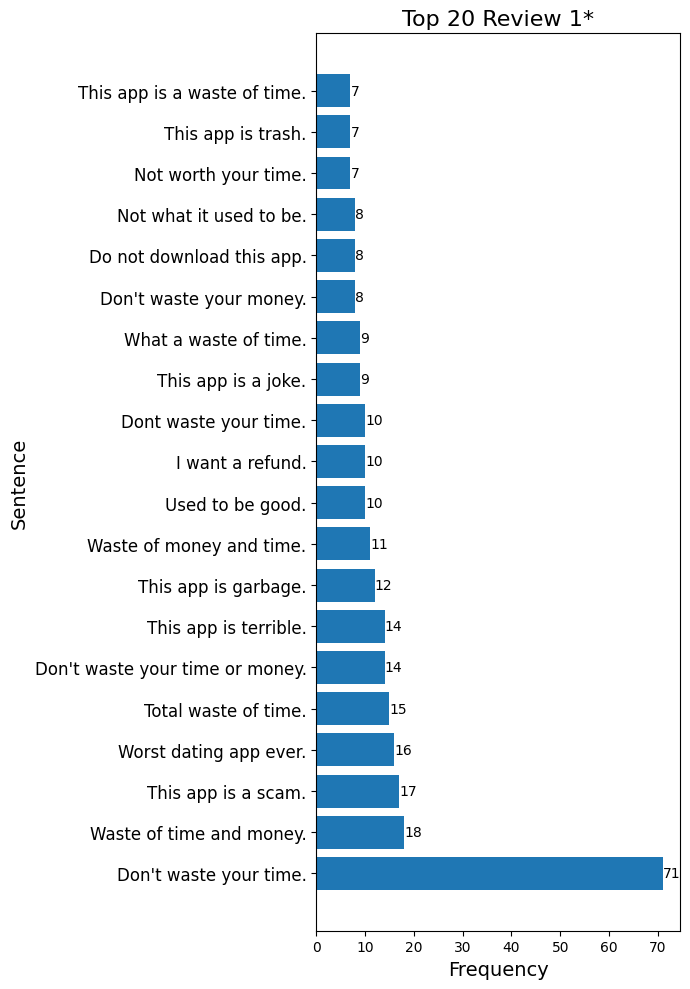

In [25]:
import matplotlib.pyplot as plt

# Extract the sentences and their frequencies
sentences, frequencies = zip(*top_sentences)

# Create a bar chart
plt.figure(figsize=(7, 10))
plt.barh(range(len(top_sentences)), [count for sentence, count in top_sentences])
plt.yticks(range(len(top_sentences)), [sentence for sentence, count in top_sentences], fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Sentence', fontsize=14)
plt.title('Top 20 Review 1*', fontsize=16)

# Add data labels to the bars
for i, frequency in enumerate(frequencies):
    plt.text(frequency, i, str(frequency), ha='left', va='center')
plt.tight_layout()

In [8]:
# Filter the data based on the score and content columns
filtered_data = data[data['score'] == 5]['content']

# Remove non-string values from the filtered_data
filtered_data = filtered_data.dropna().astype(str)

# Join all the reviews into a single string
all_reviews = ' '.join(filtered_data)

# Tokenize the reviews into sentences
sentences = sent_tokenize(all_reviews)

# Filter out stopwords
stop_words = set(stopwords.words('english'))

# Filter meaningful sentences based on length
meaningful_sentences = [sentence for sentence in sentences if len(sentence.split()) > 3 and sentence.lower() not in stop_words]

# Count the frequency of each meaningful sentence
sentence_counts = nltk.FreqDist(meaningful_sentences)

# Retrieve the most frequently mentioned meaningful sentences
top_sentences = sentence_counts.most_common(20)

# Print the top meaningful sentences and their frequencies
for sentence, count in top_sentences:
    print(f"{sentence}: {count}")

I love this app.: 28
So far so good.: 26
Very easy to use.: 16
Keep up the good work.: 12
So far so good!: 11
so far so good.: 10
I love this app!: 9
Keep up the good work!: 8
This app is great.: 7
This app is great!: 6
Give it a try.: 6
I like it a lot.: 6
So far, so good.: 5
It's a great app.: 5
It's a good app.: 5
Easy to use and navigate.: 5
Easy to use app.: 5
This is a great app.: 5
Best dating app ever.: 4
The app is good.: 4


In [9]:
# Calculate the total number of sentences
total_sentences = sum(count for sentence, count in top_sentences)

# Print the top meaningful sentences and their frequencies
for sentence, count in top_sentences:
    print(f"{sentence}: {count}")

print(f"Total: {total_sentences}")


I love this app.: 28
So far so good.: 26
Very easy to use.: 16
Keep up the good work.: 12
So far so good!: 11
so far so good.: 10
I love this app!: 9
Keep up the good work!: 8
This app is great.: 7
This app is great!: 6
Give it a try.: 6
I like it a lot.: 6
So far, so good.: 5
It's a great app.: 5
It's a good app.: 5
Easy to use and navigate.: 5
Easy to use app.: 5
This is a great app.: 5
Best dating app ever.: 4
The app is good.: 4
Total: 183


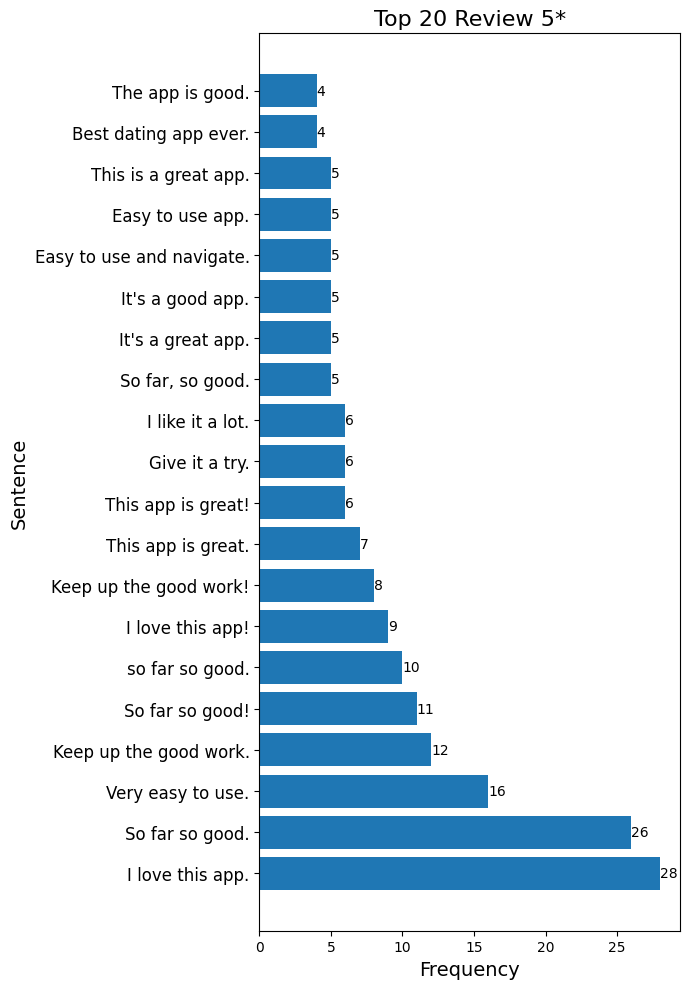

In [16]:
import matplotlib.pyplot as plt

# Extract the sentences and their frequencies
sentences, frequencies = zip(*top_sentences)

# Create a bar chart
plt.figure(figsize=(7, 10))
plt.barh(range(len(top_sentences)), [count for sentence, count in top_sentences])
plt.yticks(range(len(top_sentences)), [sentence for sentence, count in top_sentences], fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Sentence', fontsize=14)
plt.title('Top 20 Review 5*', fontsize=16)
plt.tight_layout()

# Add data labels to the bars
for i, frequency in enumerate(frequencies):
    plt.text(frequency, i, str(frequency), ha='left', va='center')

plt.show()